In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openmatrix as omx

In [21]:
# Assume you have not changed the relative paths after cloning the repository
root = os.path.dirname(os.path.abspath('.')) + '/Storied-Streets-of-Barcelona'+ '/TransportationNetworks-master'
root

'/Users/erikagutierrez/Documents/BSE/Term_2/Networks/Assignments/Final Project/Storied-Streets-of-Barcelona/TransportationNetworks-master'

In [10]:
# We list all folders available, most of which are TNTP instances
folders = [x for x in os.listdir(root)[1:] if os.path.isdir(os.path.join(root, x))]

In [11]:
folders

['Austin',
 'Braess-Example',
 'chicago-regional',
 'SiouxFalls',
 'Berlin-Tiergarten',
 'Anaheim',
 '_scripts',
 'Berlin-Friedrichshain',
 'Sydney',
 'Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center',
 'Eastern-Massachusetts',
 'Winnipeg-Asymmetric',
 'Berlin-Mitte-Center',
 'Berlin-Center',
 'SymmetricaTestCase',
 'GoldCoast',
 'Birmingham-England',
 'Philadelphia',
 'Winnipeg',
 'Chicago-Sketch',
 'Munich',
 'Terrassa-Asymmetric',
 'Hessen-Asymmetric',
 'Berlin-Prenzlauerberg-Center']

In [12]:
# Function to import OMX matrices
def import_matrix(matfile):
    f = open(matfile, 'r')
    all_rows = f.read()
    blocks = all_rows.split('Origin')[1:]
    matrix = {}
    for k in range(len(blocks)):
        orig = blocks[k].split('\n')
        dests = orig[1:]
        orig=int(orig[0])

        d = [eval('{'+a.replace(';',',').replace(' ','') +'}') for a in dests]
        destinations = {}
        for i in d:
            destinations = {**destinations, **i}
        matrix[orig] = destinations
    zones = max(matrix.keys())
    mat = np.zeros((zones, zones))
    for i in range(zones):
        for j in range(zones):
            # We map values to a index i-1, as Numpy is base 0
            mat[i, j] = matrix.get(i+1,{}).get(j+1,0)

    index = np.arange(zones) + 1

    myfile = omx.open_file('demand.omx','w')
    myfile['matrix'] = mat
    myfile.create_mapping('taz', index)
    myfile.close()

In [13]:
# If we want to import all matrices in place
for f in folders:
    mod = os.path.join(root, f)
    mod_files = os.listdir(mod)

    for i in mod_files:
        print(f.upper())
        if 'TRIPS' in i.upper() and i.lower()[-5:]=='.tntp':
            print('    trips')
            source_file = os.path.join(mod, i)
            import_matrix(source_file)

AUSTIN
AUSTIN
    trips
AUSTIN
AUSTIN
BRAESS-EXAMPLE
BRAESS-EXAMPLE
BRAESS-EXAMPLE
    trips
CHICAGO-REGIONAL
    trips
CHICAGO-REGIONAL
CHICAGO-REGIONAL
CHICAGO-REGIONAL
CHICAGO-REGIONAL
SIOUXFALLS
SIOUXFALLS
SIOUXFALLS
SIOUXFALLS
SIOUXFALLS
SIOUXFALLS
SIOUXFALLS
SIOUXFALLS
    trips
SIOUXFALLS
SIOUXFALLS
SIOUXFALLS
BERLIN-TIERGARTEN
BERLIN-TIERGARTEN
BERLIN-TIERGARTEN
BERLIN-TIERGARTEN
    trips
BERLIN-TIERGARTEN
ANAHEIM
    trips
ANAHEIM
ANAHEIM
ANAHEIM
ANAHEIM
ANAHEIM
ANAHEIM
_SCRIPTS
_SCRIPTS
BERLIN-FRIEDRICHSHAIN
    trips
BERLIN-FRIEDRICHSHAIN
BERLIN-FRIEDRICHSHAIN
BERLIN-FRIEDRICHSHAIN
BERLIN-FRIEDRICHSHAIN
SYDNEY
SYDNEY
SYDNEY
SYDNEY
SYDNEY
BERLIN-MITTE-PRENZLAUERBERG-FRIEDRICHSHAIN-CENTER
BERLIN-MITTE-PRENZLAUERBERG-FRIEDRICHSHAIN-CENTER
BERLIN-MITTE-PRENZLAUERBERG-FRIEDRICHSHAIN-CENTER
    trips
BERLIN-MITTE-PRENZLAUERBERG-FRIEDRICHSHAIN-CENTER
BERLIN-MITTE-PRENZLAUERBERG-FRIEDRICHSHAIN-CENTER
EASTERN-MASSACHUSETTS
EASTERN-MASSACHUSETTS
EASTERN-MASSACHUSETTS
EASTERN-MASSACHU

ValueError: max() arg is an empty sequence

## Anheim description of the data

In [14]:
# Importing the networks into a Pandas dataframe consists of a single line of code
# but we can also make sure all headers are lower case and without trailing spaces

netfile = os.path.join(root, 'Anaheim','Anaheim_net.tntp')
net = pd.read_csv(netfile, skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed

# And drop the silly first andlast columns
net.drop(['~', ';'], axis=1, inplace=True)

In [15]:
net


init_node  term_node  capacity  length  free_flow_time     b  power  \
0            1        117      9000    5280        1.090458  0.15      4   
1            2         87      9000    5280        1.090458  0.15      4   
2            3         74      9000    5280        1.090458  0.15      4   
3            4        233      9000    5280        1.090458  0.15      4   
4            5        165      9000    5280        1.090458  0.15      4   
..         ...        ...       ...     ...             ...   ...    ...   
909        414        405      5400    5280        2.000000  0.15      4   
910        415         22      5400    2640        1.000000  0.15      4   
911        415        406      5400    5280        2.000000  0.15      4   
912        416         23      5400    2640        1.000000  0.15      4   
913        416        407      5400    5280        2.000000  0.15      4   

     speed  toll  link_type  
0     4842     0          1  
1     4842     0          1  
2     4842     0          1  
3     4842     0          1  
4     4842     0          1  
..     ...   ...        ...  
909   2640     0          1  
910   2640     0          1  
911   2640     0          1  
912   2640     0          1  
913   2640     0          1  

[914 rows x 10 columns]

In [16]:
net.columns = ["init_node", "term_node","Capacity (veh/h)","Length (ft)","Free Flow Time (min)","B","Power","Speed (ft/min)","Toll","Type"]

In [17]:
net.describe()

init_node   term_node  Capacity (veh/h)  Length (ft)  \
count  914.000000  914.000000        914.000000   914.000000   
mean   248.842451  248.966083       6030.196937  2691.373085   
std    119.775855  119.608397       2507.637090  1733.458821   
min      1.000000    1.000000       1800.000000   264.000000   
25%    149.250000  150.250000       5400.000000  1320.000000   
50%    279.500000  279.500000       5400.000000  1901.000000   
75%    348.000000  348.000000       7200.000000  3960.000000   
max    416.000000  416.000000      12600.000000  9451.000000   

       Free Flow Time (min)             B  Power  Speed (ft/min)   Toll   Type  
count            914.000000  9.140000e+02  914.0      914.000000  914.0  914.0  
mean               0.882353  1.500000e-01    4.0     3580.844639    0.0    1.0  
std                0.645135  2.777077e-17    0.0     1665.334161    0.0    0.0  
min                0.054523  1.500000e-01    4.0     2640.000000    0.0    1.0  
25%                0.420076  1.500000e-01    4.0     2640.000000    0.0    1.0  
50%                0.627014  1.500000e-01    4.0     2640.000000    0.0    1.0  
75%                1.090458  1.500000e-01    4.0     4842.000000    0.0    1.0  
max                3.579924  1.500000e-01    4.0     8855.000000    0.0    1.0

In [18]:
net.columns

Index(['init_node', 'term_node', 'Capacity (veh/h)', 'Length (ft)',
       'Free Flow Time (min)', 'B', 'Power', 'Speed (ft/min)', 'Toll', 'Type'],
      dtype='object')

## Barcelona description of the data

In [31]:
# Importing the networks into a Pandas dataframe consists of a single line of code
# but we can also make sure all headers are lower case and without trailing spaces

netfile = os.path.join(root, 'Barcelona','Barcelona_net.tntp')
net = pd.read_csv(netfile, skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed

# And drop the silly first andlast columns
net.drop(['~', ';'], axis=1, inplace=True)

In [32]:
net.head()


init_node  term_node  capacity    length  free_flow_time    b  power  \
0          1        290         1  1.083333        1.083333  0.0    0.0   
1          1        307         1  1.083333        1.083333  0.0    0.0   
2          1        316         1  1.083333        1.083333  0.0    0.0   
3          2        302         1  1.666667        1.666667  0.0    0.0   
4          2        304         1  1.666667        1.666667  0.0    0.0   

   speed  toll  link_type  
0      0     0          9  
1      0     0          9  
2      0     0          9  
3      0     0          9  
4      0     0          9

In [33]:
net.columns = ["init_node", "term_node","Capacity (veh/h)","Length (ft)","Free Flow Time (min)","B","Power","Speed (ft/min)","Toll","Type"]

In [34]:
net.describe()

init_node    term_node  Capacity (veh/h)  Length (ft)  \
count  2522.000000  2522.000000            2522.0  2522.000000   
mean    552.013481   553.138779               1.0     0.645347   
std     292.815176   292.902726               0.0     1.650823   
min       1.000000     1.000000               1.0     0.051429   
25%     313.000000   313.250000               1.0     0.188571   
50%     560.000000   562.000000               1.0     0.373333   
75%     821.000000   822.000000               1.0     0.778333   
max    1020.000000  1020.000000               1.0    55.000000   

       Free Flow Time (min)             B        Power  Speed (ft/min)  \
count           2522.000000  2.522000e+03  2522.000000          2522.0   
mean               0.645347  8.789544e-12     4.245316             0.0   
std                1.650823  1.029939e-10     3.607161             0.0   
min                0.051429  0.000000e+00     0.000000             0.0   
25%                0.188571  1.967150e-67     4.217250             0.0   
50%                0.373333  1.087306e-18     4.446000             0.0   
75%                0.778333  7.010272e-18     4.924000             0.0   
max               55.000000  2.176649e-09    16.830000             0.0   

         Toll         Type  
count  2522.0  2522.000000  
mean      0.0     2.792228  
std       0.0     3.336189  
min       0.0     1.000000  
25%       0.0     1.000000  
50%       0.0     1.000000  
75%       0.0     1.000000  
max       0.0     9.000000

In [ ]:
net.columns

Index(['init_node', 'term_node', 'capacity', 'length', 'free_flow_time', 'b',
       'power', 'speed', 'toll', 'link_type'],
      dtype='object')

## Terrassa description of the data

In [35]:
## Barcelona description of the data
# Importing the networks into a Pandas dataframe consists of a single line of code
# but we can also make sure all headers are lower case and without trailing spaces

netfile = os.path.join(root, 'Terrassa-Asymmetric','Terrassa-Asym_net.tntp')
net = pd.read_csv(netfile, skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed

# And drop the silly first andlast columns
net.drop(['~', ';'], axis=1, inplace=True)


In [36]:
net.head()


init_node  term_node   capacity  length  free_flow_time    b  power  \
0          1        304  1499990.0    0.33            0.75  0.1    1.5   
1          1        425  1499990.0    0.32            0.75  0.1    1.5   
2          1        513  1499990.0    0.11            0.75  0.1    1.5   
3          1        536  1499990.0    0.39            0.75  0.1    1.5   
4          1        566  1499990.0    0.20            0.75  0.1    1.5   

      speed  toll link_type  
0   50.0000     0        1;  
1   80.0000     0        1;  
2  100.0000     0        1;  
3   70.4496     0        1;  
4   30.0000     0        1;

In [37]:

net.columns = ["init_node", "term_node","Capacity (veh/h)","Length (ft)","Free Flow Time (min)","B","Power","Speed (ft/min)","Toll","Type"]
net.describe()


init_node    term_node  Capacity (veh/h)  Length (ft)  \
count  3264.000000  3264.000000      3.264000e+03  3264.000000   
mean    813.303309   813.388174      1.534733e+05     0.131026   
std     475.265488   475.677660      4.370621e+05     0.149423   
min       1.000000     1.000000      4.500000e+03     0.000000   
25%     392.750000   389.750000      9.000000e+03     0.060000   
50%     835.000000   837.500000      1.125000e+04     0.100000   
75%    1228.250000  1228.250000      1.350000e+04     0.150000   
max    1609.000000  1609.000000      1.499990e+06     2.020000   

       Free Flow Time (min)             B   Power  Speed (ft/min)    Toll  
count               3264.00  3.264000e+03  3264.0     3264.000000  3264.0  
mean                   0.75  1.000000e-01     1.5       75.240975     0.0  
std                    0.00  1.387991e-17     0.0       32.706650     0.0  
min                    0.75  1.000000e-01     1.5       10.441800     0.0  
25%                    0.75  1.000000e-01     1.5       50.000000     0.0  
50%                    0.75  1.000000e-01     1.5       80.000000     0.0  
75%                    0.75  1.000000e-01     1.5      100.000000     0.0  
max                    0.75  1.000000e-01     1.5      120.000000     0.0

In [ ]:
net.columns

## Gold Coast description of the data

In [55]:
## Barcelona description of the data
# Importing the networks into a Pandas dataframe consists of a single line of code
# but we can also make sure all headers are lower case and without trailing spaces

netfile = os.path.join(root, 'GoldCoast','Goldcoast_network_2016_01.tntp')
net = pd.read_csv(netfile, skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed

# And drop the silly first andlast columns
net.drop(['~', ';'], axis=1, inplace=True)


In [56]:
net


init_node  term_node  capacity  length  free_flow_time      b  power  \
0              1       1371     900.0    0.30           0.327  0.282    4.0   
1              2       2012    1600.0    0.26           0.173  0.282    4.0   
2              3       2402    1100.0    0.20           0.200  0.282    4.0   
3              4       1875     800.0    0.16           0.128  0.282    4.0   
4              5       1880     800.0    0.20           0.171  0.282    4.0   
...          ...        ...       ...     ...             ...    ...    ...   
11135       4806       1495     600.0    0.09           0.120  0.667    4.0   
11136       4806       3606     600.0    0.09           0.120  0.667    4.0   
11137       4806        415    1800.0    0.23           0.575  0.000    4.0   
11138       4807       1433     400.0    0.05           0.060  0.667    4.0   
11139       4807       1434     400.0    0.39           0.468  0.667    4.0   

       speed  critical_speed  lanes  
0         55            42.9      2  
1         90            70.2      2  
2         60            46.8      2  
3         75            58.5      1  
4         70            54.6      1  
...      ...             ...    ...  
11135     45            27.0      1  
11136     45            27.0      1  
11137     24            24.0      5  
11138     50            30.0      2  
11139     50            30.0      1  

[11140 rows x 10 columns]

In [ ]:

net.columns = ["init_node", "term_node","Capacity (veh/h)","Length (ft)","Free Flow Time (min)","B","Power","Speed (ft/min)","Toll","Type"]
net.describe()


init_node    term_node  Capacity (veh/h)  Length (ft)  \
count  3264.000000  3264.000000      3.264000e+03  3264.000000   
mean    813.303309   813.388174      1.534733e+05     0.131026   
std     475.265488   475.677660      4.370621e+05     0.149423   
min       1.000000     1.000000      4.500000e+03     0.000000   
25%     392.750000   389.750000      9.000000e+03     0.060000   
50%     835.000000   837.500000      1.125000e+04     0.100000   
75%    1228.250000  1228.250000      1.350000e+04     0.150000   
max    1609.000000  1609.000000      1.499990e+06     2.020000   

       Free Flow Time (min)             B   Power  Speed (ft/min)    Toll  
count               3264.00  3.264000e+03  3264.0     3264.000000  3264.0  
mean                   0.75  1.000000e-01     1.5       75.240975     0.0  
std                    0.00  1.387991e-17     0.0       32.706650     0.0  
min                    0.75  1.000000e-01     1.5       10.441800     0.0  
25%                    0.75  1.000000e-01     1.5       50.000000     0.0  
50%                    0.75  1.000000e-01     1.5       80.000000     0.0  
75%                    0.75  1.000000e-01     1.5      100.000000     0.0  
max                    0.75  1.000000e-01     1.5      120.000000     0.0

In [ ]:
net.columns

In [25]:
flowfile = os.path.join(root, 'Anaheim','Anaheim_flow.tntp')
flow = pd.read_csv(flowfile, skiprows=8, sep='\t')

In [26]:
flow

8   411   722.1000000000422   1.0000479629182888 
0      9   379         1187.032944             1.000350
1      9   395         1050.467056             1.000215
2     10   338           69.200000             1.000000
3     10   362           80.100000             1.000000
4     11   309          485.800000             1.000010
..   ...   ...                 ...                  ...
901  414   405          619.800000             2.000052
902  415    22          934.200000             1.000134
903  415   406          904.600000             2.000236
904  416    23          387.900000             1.000004
905  416   407         1522.500000             2.001896

[906 rows x 4 columns]

## Sioux description of the data

In [58]:
## Gold Coast description of the data
## Barcelona description of the data
# Importing the networks into a Pandas dataframe consists of a single line of code
# but we can also make sure all headers are lower case and without trailing spaces

netfile = os.path.join(root, 'SiouxFalls','SiouxFalls_net.tntp')
net = pd.read_csv(netfile, skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed

# And drop the silly first andlast columns
net.drop(['~', ';'], axis=1, inplace=True)

In [59]:
net



init_node  term_node      capacity  length  free_flow_time     b  power  \
0           1          2  25900.200640       6               6  0.15      4   
1           1          3  23403.473190       4               4  0.15      4   
2           2          1  25900.200640       6               6  0.15      4   
3           2          6   4958.180928       5               5  0.15      4   
4           3          1  23403.473190       4               4  0.15      4   
..        ...        ...           ...     ...             ...   ...    ...   
71         23         22   5000.000000       4               4  0.15      4   
72         23         24   5078.508436       2               2  0.15      4   
73         24         13   5091.256152       4               4  0.15      4   
74         24         21   4885.357564       3               3  0.15      4   
75         24         23   5078.508436       2               2  0.15      4   

    speed  toll  link_type  
0       0     0          1  
1       0     0          1  
2       0     0          1  
3       0     0          1  
4       0     0          1  
..    ...   ...        ...  
71      0     0          1  
72      0     0          1  
73      0     0          1  
74      0     0          1  
75      0     0          1  

[76 rows x 10 columns]

In [60]:

net.columns = ["init_node", "term_node","Capacity (veh/h)","Length (ft)","Free Flow Time (min)","B","Power","Speed (ft/min)","Toll","Type"]
net.describe()

init_node  term_node  Capacity (veh/h)  Length (ft)  \
count  76.000000  76.000000         76.000000    76.000000   
mean   13.013158  13.013158      10247.206327     4.131579   
std     6.690278   6.690278       7358.655049     1.730835   
min     1.000000   1.000000       4823.950831     2.000000   
25%     8.000000   8.000000       4958.180928     3.000000   
50%    13.000000  13.000000       5109.391136     4.000000   
75%    19.000000  19.000000      14564.753150     5.000000   
max    24.000000  24.000000      25900.200640    10.000000   

       Free Flow Time (min)      B  Power  Speed (ft/min)  Toll  Type  
count             76.000000  76.00   76.0            76.0  76.0  76.0  
mean               4.131579   0.15    4.0             0.0   0.0   1.0  
std                1.730835   0.00    0.0             0.0   0.0   0.0  
min                2.000000   0.15    4.0             0.0   0.0   1.0  
25%                3.000000   0.15    4.0             0.0   0.0   1.0  
50%                4.000000   0.15    4.0             0.0   0.0   1.0  
75%                5.000000   0.15    4.0             0.0   0.0   1.0  
max               10.000000   0.15    4.0             0.0   0.0   1.0

In [61]:
net.columns

Index(['init_node', 'term_node', 'Capacity (veh/h)', 'Length (ft)',
       'Free Flow Time (min)', 'B', 'Power', 'Speed (ft/min)', 'Toll', 'Type'],
      dtype='object')

## All networks descriptive data

In [23]:
#path = "../TransportationNetworks-master/"
len_networks = {}
import os
for network_folder in os.listdir(root):
    print(network_folder)
    if ".DS" in network_folder:
        continue
    network_path = os.path.join(root,network_folder)
    network_file = [file for file in os.listdir(network_path) if "net" in file]
    print(network_file)
    if network_file != []:
        netfile = os.path.join(network_path,network_file[0])
        net = pd.read_csv(netfile, skiprows=8, sep='\t')

        len_networks[network_folder] = net.shape[0]    

Barcelona
['Barcelona_net.tntp']
Austin
['Austin_net.tntp']
Braess-Example
['Braess_net.tntp']
chicago-regional
['ChicagoRegional_net.tntp']
SiouxFalls
['SiouxFalls_net.tntp']
Berlin-Tiergarten
['berlin-tiergarten_net.tntp']
.DS_Store
Anaheim
['Anaheim_net.tntp']
_scripts
['parsing networks in Julia.ipynb']
Berlin-Friedrichshain
['friedrichshain-center_net.tntp']
Sydney
['Sydney_net.tntp', 'RE use of Sydney and Gold Coast networks.msg']
Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center
['berlin-mitte-prenzlauerberg-friedrichshain-center_net.tntp']
Eastern-Massachusetts
['EMA_net.tntp']
Winnipeg-Asymmetric
['Winnipeg-Asym_net.tntp']
Berlin-Mitte-Center
['berlin-mitte-center_net.tntp']
Berlin-Center
['berlin-center_net.tntp']
SymmetricaTestCase
[]
GoldCoast
['Goldcoast_network_2016_01.tntp']
Birmingham-England
[]
Philadelphia
['Philadelphia_net.tntp']
Winnipeg
['Winnipeg_net.tntp']
Chicago-Sketch
['ChicagoSketch_net.tntp']
Munich
['munich_net.tntp']
Terrassa-Asymmetric
['Terrassa-Asym_ne

In [24]:
len_networks

{'Barcelona': 2522,
 'Austin': 18961,
 'Braess-Example': 5,
 'chicago-regional': 39018,
 'SiouxFalls': 76,
 'Berlin-Tiergarten': 766,
 'Anaheim': 914,
 '_scripts': 523,
 'Berlin-Friedrichshain': 523,
 'Sydney': 75379,
 'Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center': 2184,
 'Eastern-Massachusetts': 258,
 'Winnipeg-Asymmetric': 2535,
 'Berlin-Mitte-Center': 871,
 'Berlin-Center': 28376,
 'GoldCoast': 11140,
 'Philadelphia': 40003,
 'Winnipeg': 2836,
 'Chicago-Sketch': 2950,
 'Munich': 8515,
 'Terrassa-Asymmetric': 3264,
 'Hessen-Asymmetric': 6674,
 'Berlin-Prenzlauerberg-Center': 749}

## Trying implementation of Eric package suggestion (https://nbviewer.org/github/PyTrans/Urban-Network-Analysis/blob/master/Trip_Assignment-Frank-Wolfe_Algorithm.ipynb)

In the example of the jupyter notebook this method is imported from their package. I tried importing it, but it had errors for some reason. I decided to just copy the python file containing the class definition, as it does not have dependencies with the rest of the package. This class allows us to connect the dataframe given by https://github.com/bstabler/TransportationNetworks with the mathematical model. Also, it has methods to visualize the graphs.

In [44]:
from TransportationNetworks import Network 

In [45]:
import os
import sys
import numpy as np
import pandas as pd
import openmatrix as omx

In [46]:
#imputing packages
import networkx as nx
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [58]:
#paths to load files
directory = root + "/SiouxFalls/"
link_file = '{}SiouxFalls_net.tntp'.format(directory)
trip_file = '{}SiouxFalls_trips.tntp'.format(directory)
node_file = '{}SiouxFalls_node.tntp'.format(directory)

In [48]:
#paths to load files
directory = root + "/Anaheim/"
link_file = '{}Anaheim_net.tntp'.format(directory)
trip_file = '{}Anaheim_trips.tntp'.format(directory)
node_file = '{}Anaheim_node.tntp'.format(directory)

In [49]:
#paths to load files
directory = root + "/Eastern-Massachusetts/"
link_file = '{}EMA_net.tntp'.format(directory)
trip_file = '{}EMA_trips.tntp'.format(directory)
node_file = None

Expected fields of the dataframe: 
```python
link_fields = {"from": 1, "to": 2, "capacity": 3, "length": 4, "t0": 5, \
                   "B": 6, "beta": 7, "V": 8}
```

To understand how this is used, the class latter on defines the following variables:
```python
to_node = str(int(data[self.link_fields["to"]]))
            capacity = float(data[self.link_fields["capacity"]])
            length = float(data[self.link_fields["length"]])
            alpha = float(data[self.link_fields["B"]])
            beta = float(data[self.link_fields["beta"]])
```

The class inside goes line by line getting the information

In [59]:
SO = False
siouxFalls = Network(link_file, trip_file,node_file, SO)

In [60]:
## initialization

# define output variables, network and fwResult
network = {(u,v): {'t0':d['object'].t0, 'alpha':d['object'].alpha, \
           'beta':d['object'].beta, 'capa':d['object'].capacity, 'flow':[], \
           'auxiliary':[], 'cost':[]} for (u, v, d) in siouxFalls.graph.edges(data=True)}

fwResult = {'theta':[], 'z':[]}

# initial all-or-nothing assignment and update link travel time(cost)
siouxFalls.all_or_nothing_assignment()
siouxFalls.update_linkcost()

for linkKey, linkVal in network.items():
    linkVal['cost'].append(siouxFalls.graph[linkKey[0]][linkKey[1]]['weight'])
    linkVal['auxiliary'].append(siouxFalls.graph[linkKey[0]][linkKey[1]]['object'].vol)
    linkVal['flow'].append(siouxFalls.graph[linkKey[0]][linkKey[1]]['object'].vol)

In [61]:
def BPR(t0, xa, ca, alpha, beta):
    ta = t0*(1+alpha*(xa/ca)**beta)
    return ta


def calculateZ(theta, network, SO):
    z = 0
    for linkKey, linkVal in network.items():
        t0 = linkVal['t0']
        ca = linkVal['capa']
        beta = linkVal['beta']
        alpha = linkVal['alpha']
        aux = linkVal['auxiliary'][-1]
        flow = linkVal['flow'][-1]
        
        if SO == False:
            z += integrate.quad(lambda x: BPR(t0, x, ca, alpha, beta), 0, flow+theta*(aux-flow))[0]
        elif SO == True:
            z += list(map(lambda x : x * BPR(t0, x, ca, alpha, beta), [flow+theta*(aux-flow)]))[0]
    return z

def lineSearch(network, SO):
    theta = minimize_scalar(lambda x: calculateZ(x, network, SO), bounds = (0,1), method = 'Bounded')
    return theta.x

## iterations
iterNum=0
iteration = True
while iteration:
    iterNum += 1
    siouxFalls.all_or_nothing_assignment()
    siouxFalls.update_linkcost()
    
    # set auxiliary flow using updated link flow
    for linkKey, linkVal in network.items():
        linkVal['auxiliary'].append(siouxFalls.graph[linkKey[0]][linkKey[1]]['object'].vol)
        
    # getting optimal move size (theta)
    theta = lineSearch(network, SO)
    fwResult['theta'].append(theta)
    
    # set link flow (move) based on the theta, auxiliary flow, and link flow of previous iteration
    for linkKey, linkVal in network.items():
        aux = linkVal['auxiliary'][-1]
        flow = linkVal['flow'][-1]
        linkVal['flow'].append(flow + theta*(aux-flow))
        
        siouxFalls.graph[linkKey[0]][linkKey[1]]['object'].vol =  flow + theta * (aux - flow)
        siouxFalls.graph[linkKey[0]][linkKey[1]]['object'].flow = flow + theta * (aux - flow)
        
    # update link travel time
    siouxFalls.update_linkcost()
    
    # calculate objective function value
    z=0
    for linkKey, linkVal in network.items():
        linkVal['cost'].append(siouxFalls.graph[linkKey[0]][linkKey[1]]['weight'])
        totalcost = siouxFalls.graph[linkKey[0]][linkKey[1]]['object'].get_objective_function()
        z+=totalcost
        
    fwResult['z'].append(z)        
        
    # convergence test
    if iterNum == 1:
        iteration = True
    else:
        if abs(fwResult['z'][-2] - fwResult['z'][-1]) <= 0.001 or iterNum==3000:
            iteration = False
            

In [62]:
#results 
for (u, v, d) in siouxFalls.graph.edges(data=True):
    print(u, ' -> ', v, ': ', d['object'].vol)

1  ->  2 :  4494.541769784984
1  ->  3 :  8118.778958294006
2  ->  1 :  4519.2217979362385
2  ->  6 :  5967.415424045609
3  ->  1 :  8094.098930142726
3  ->  4 :  14011.734532547742
3  ->  12 :  10027.635980519834
6  ->  2 :  5992.095452196839
6  ->  5 :  8806.410890329136
6  ->  8 :  12492.07533894963
4  ->  3 :  14035.300255016178
4  ->  5 :  18010.561177852334
4  ->  11 :  5203.138655249963
12  ->  3 :  9979.390229900207
12  ->  11 :  8404.306735841823
12  ->  13 :  12293.49958218216
5  ->  4 :  18034.52551780119
5  ->  6 :  8797.189586981583
5  ->  9 :  15783.99628930851
11  ->  4 :  5302.740037769514
11  ->  10 :  17603.652145817512
11  ->  12 :  8365.259304266572
11  ->  14 :  9776.84654332046
9  ->  5 :  15798.739325909786
9  ->  8 :  6837.003588250082
9  ->  10 :  21745.9882349121
8  ->  6 :  12525.976670448466
8  ->  7 :  12041.69663131243
8  ->  9 :  6881.813917212696
8  ->  16 :  8387.782258834914
7  ->  8 :  12102.268632545403
7  ->  18 :  15797.411851008834
18  ->  7 :  15

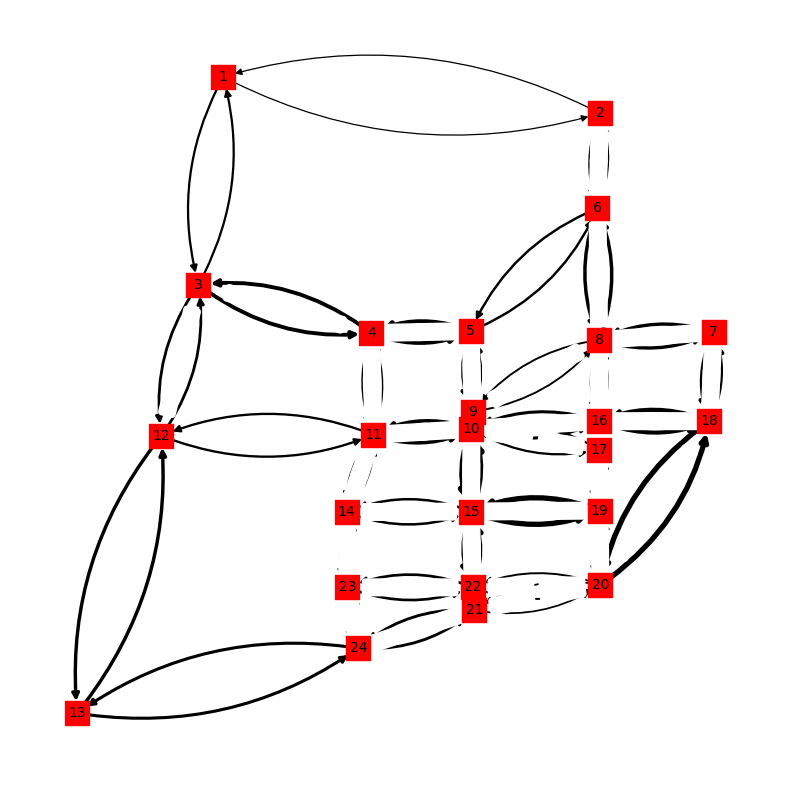

In [63]:
#visualization
edgewidth = [d['object'].vol/5000 for (u, v, d) in siouxFalls.graph.edges(data=True)]

if node_file != None:
    plt.figure(num = 1, figsize=(10,10))
    plt.axis('off')
    
    pos = nx.get_node_attributes(siouxFalls.graph, "pos")

    nx.draw_networkx_edges(siouxFalls.graph, pos, width=edgewidth, style="solid", arrows=True, connectionstyle="arc3,rad=0.2")
    nx.draw_networkx_edge_labels(siouxFalls.graph, pos, \
                                 edge_labels={(u, v): round(d["object"].vol,0) for u, v, d in siouxFalls.graph.edges(data=True)}, \
                                 font_size=8, label_pos=0.3, alpha=0.)
    nx.draw_networkx_nodes(siouxFalls.graph, pos, node_shape="s", node_color= "red")
    nx.draw_networkx_labels(siouxFalls.graph, pos, font_size=10)
    
    plt.show()

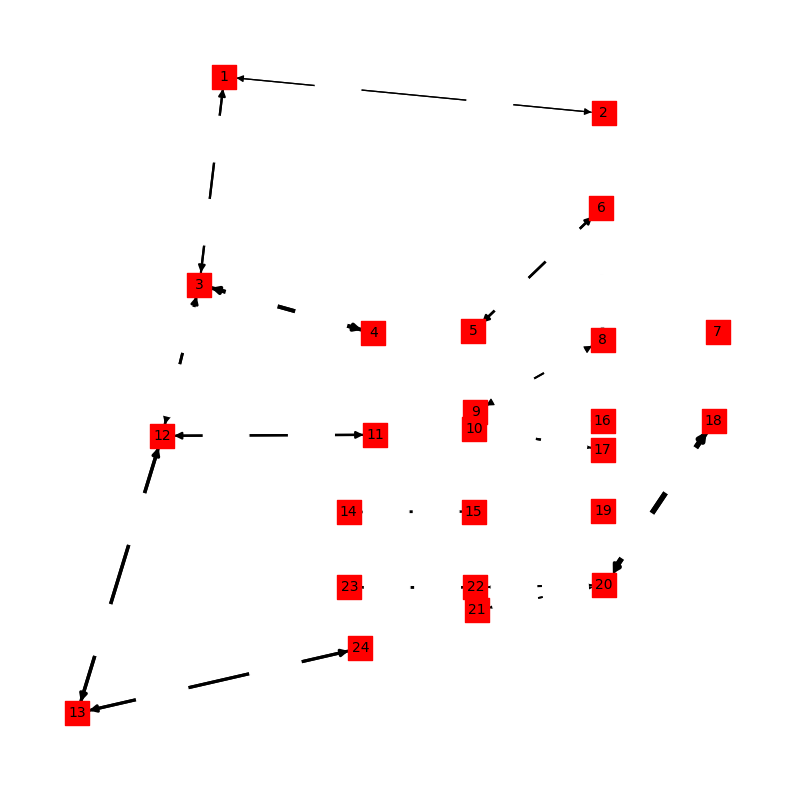

In [64]:
#visualization
edgewidth = [d['object'].vol/5000 for (u, v, d) in siouxFalls.graph.edges(data=True)]

if node_file != None:
    plt.figure(num = 1, figsize=(10,10))
    plt.axis('off')
    
    pos = nx.get_node_attributes(siouxFalls.graph, "pos")

    nx.draw_networkx_edges(siouxFalls.graph, pos, width=edgewidth, style="solid", arrows=True)
    nx.draw_networkx_edge_labels(siouxFalls.graph, pos, \
                                 edge_labels={(u, v): round(d["object"].vol,0) for u, v, d in siouxFalls.graph.edges(data=True)}, \
                                 font_size=8, label_pos=0.3, alpha=0.)
    nx.draw_networkx_nodes(siouxFalls.graph, pos, node_shape="s", node_color= "red")
    nx.draw_networkx_labels(siouxFalls.graph, pos, font_size=10)
    
    plt.show()

In [71]:
network[('1', '2')].keys()

dict_keys(['t0', 'alpha', 'beta', 'capa', 'flow', 'auxiliary', 'cost'])

In [68]:
for i in network.keys():
    print(i)

('1', '2')
('1', '3')
('2', '1')
('2', '6')
('3', '1')
('3', '4')
('3', '12')
('6', '2')
('6', '5')
('6', '8')
('4', '3')
('4', '5')
('4', '11')
('12', '3')
('12', '11')
('12', '13')
('5', '4')
('5', '6')
('5', '9')
('11', '4')
('11', '10')
('11', '12')
('11', '14')
('9', '5')
('9', '8')
('9', '10')
('8', '6')
('8', '7')
('8', '9')
('8', '16')
('7', '8')
('7', '18')
('18', '7')
('18', '16')
('18', '20')
('16', '8')
('16', '10')
('16', '17')
('16', '18')
('10', '9')
('10', '11')
('10', '15')
('10', '16')
('10', '17')
('15', '10')
('15', '14')
('15', '19')
('15', '22')
('17', '10')
('17', '16')
('17', '19')
('14', '11')
('14', '15')
('14', '23')
('13', '12')
('13', '24')
('24', '13')
('24', '21')
('24', '23')
('23', '14')
('23', '22')
('23', '24')
('19', '15')
('19', '17')
('19', '20')
('22', '15')
('22', '20')
('22', '21')
('22', '23')
('20', '18')
('20', '19')
('20', '21')
('20', '22')
('21', '20')
('21', '22')
('21', '24')


In [72]:
network

{('1', '2'): {'t0': 6.0,
  'alpha': 0.15,
  'beta': 4.0,
  'capa': 25900.20064,
  'flow': [6100.0,
   5207.3577456743615,
   4711.657897116817,
   4930.6566353398575,
   4730.6043505599655,
   4827.10754326619,
   4636.859945865559,
   4716.003384681179,
   4508.963543283107,
   4601.436769897257,
   4441.547483051976,
   4547.956882544544,
   5438.85394256457,
   5226.606188797666,
   4849.050563684846,
   4814.696103306737,
   4640.649768002839,
   4804.973897181076,
   4649.113505906069,
   4590.19679252602,
   4434.2013303273825,
   4486.32967998925,
   4426.937820869264,
   4719.457656289684,
   4670.276410678151,
   4603.70771611823,
   4533.041846267673,
   4524.797833255787,
   4461.184113397855,
   4676.75598518685,
   4570.532597612473,
   4599.482742772025,
   4523.084262199975,
   4519.235180724419,
   4479.3711193288655,
   4641.372016238789,
   4608.34882068811,
   4574.367489775574,
   4532.286360256139,
   4488.4933809550175,
   4486.043875193992,
   4454.4937959228555,

In [75]:
fwResult.keys()

dict_keys(['theta', 'z'])

In [76]:
fwResult['z']

[8025595.528153863,
 5727778.4895213535,
 5211497.7626705775,
 4977167.336754129,
 4840310.029588427,
 4707076.831878039,
 4641063.986903633,
 4553779.810238839,
 4514645.532524665,
 4463900.670075694,
 4430215.033643087,
 4385367.097216202,
 4361439.458007684,
 4335173.030902135,
 4325159.81446179,
 4314452.582366676,
 4308672.34721257,
 4300560.772697361,
 4296255.463453676,
 4287427.541851311,
 4283218.273902033,
 4280150.569528654,
 4276649.92879267,
 4274662.698570085,
 4272322.757267172,
 4269657.197714989,
 4267191.233378563,
 4264866.763823307,
 4262996.579058589,
 4260052.296472022,
 4258615.169219652,
 4256864.679434327,
 4255874.910283321,
 4254785.10989496,
 4253614.892284734,
 4252916.393537711,
 4252212.5068825865,
 4251341.67675792,
 4250280.383872113,
 4249681.044996069,
 4249055.640373912,
 4248488.136046214,
 4247692.43988052,
 4247297.247418597,
 4246814.402352304,
 4246448.880614404,
 4245971.676106247,
 4245592.535241081,
 4245291.996319473,
 4244764.224592003,
 42